C:\Users\Deepa\AppData\Local\Temp\ipykernel_24780\458296946.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=48, freq='M')


,Sales
2020-01-31,118.820262
2020-02-29,121.448954
2020-03-31,129.149009
2020-04-30,134.907953
2020-05-31,127.848428


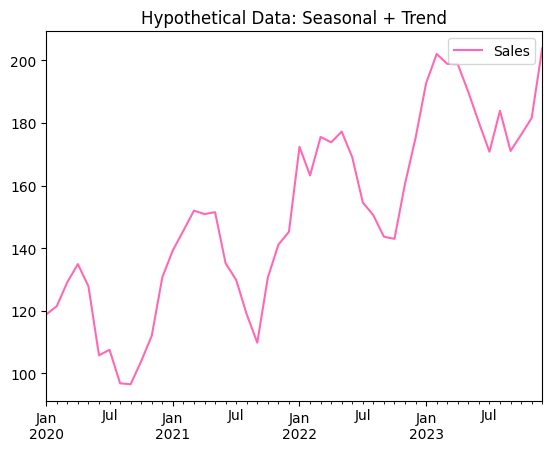

C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -117.116
Date:                            Tue, 14 Oct 2025   AIC                            244.233
Time:                                    21:54:06   BIC                            252.010
Sample:                                01-31-2020   HQIC                           246.917
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0028      0.258     -0.011      0.991      -0.509       0.503
ma.L1         -0.9996     40.374   

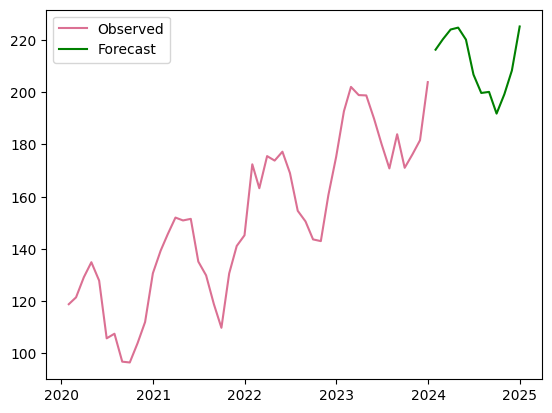

In [8]:
#seasonal pattern
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
#generate data 
np.random.seed(0) 
date_range = pd.date_range(start='2020-01-01', periods=48, freq='M') 
trend = np.linspace(100, 200, 48) 
seasonality = 20 * np.sin(2 * np.pi * date_range.month / 12) 
noise = np.random.normal(0, 5, 48) 
data = trend + seasonality + noise 
df = pd.DataFrame({'Sales': data}, index=date_range) 
display(df.head())
df.plot(title='Hypothetical Data: Seasonal + Trend', color='hotpink') 
plt.show()
model = SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12)) 
result = model.fit() 
print(result.summary())
forecast = result.get_forecast(steps=12) 
forecast_df = forecast.summary_frame() 
forecast_df 
plt.plot(df, label = 'Observed', color='palevioletred') 
plt.plot(forecast_df['mean'], label = 'Forecast', color='green') 
#plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], 
#forecast_df['mean_ci_upper'], color='forestgreen', alpha=0.3) 
#plt.title('SARIMA Forecast (Seasonal + Trend)') 
plt.legend() 
plt.show() 

In [9]:
#generate synthetic seasonal data (no trend) 
np.random.seed(1) 
dates = pd.date_range(start='2021-01', periods=36, freq='M') 
seasonality = 30 + 15 * np.sin(2 * np.pi * dates.month / 12) 
noise = np.random.normal(0, 3, 36) 
values = seasonality + noise 
df = pd.DataFrame({'Value': values}, index=dates) 
display(df.head())

C:\Users\Deepa\AppData\Local\Temp\ipykernel_24780\3172082076.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2021-01', periods=36, freq='M')


,Value
2021-01-31,42.373036
2021-02-28,41.155112
2021-03-31,43.415485
2021-04-30,39.771475
2021-05-31,40.096223


C:\Users\Deepa\AppData\Local\Temp\ipykernel_24780\284987471.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2019-01', periods=60, freq='M')


,Value
2019-01-31,95.166484
2019-02-28,108.513100
2019-03-31,109.625913
2019-04-30,113.731816
2019-05-31,95.667366


C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -126.928
Date:                            Tue, 14 Oct 2025   AIC                            263.857
Time:                                    22:07:27   BIC                            273.108
Sample:                                01-31-2019   HQIC                           267.338
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3949      0.214      1.847      0.065      -0.024       0.814
ma.L1         -0.9998     48.570   

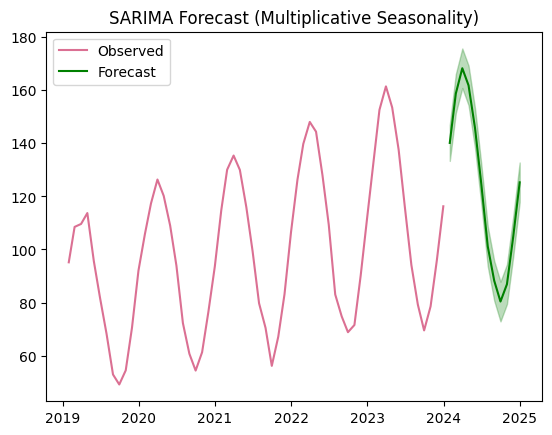

In [11]:

#generate multiplicative seasonal data 
np.random.seed(2) 
months = pd.date_range(start='2019-01', periods=60, freq='M') 
trend = np.linspace(80, 120, 60) 
seasonal_factor = 1 + 0.4 * np.sin(2 * np.pi * months.month / 12) 
noise = np.random.normal(0, 2, 60) 
values = trend * seasonal_factor + noise 
 
df = pd.DataFrame({'Value': values}, index=months) 
display(df.head())

model = SARIMAX(df['Value'], order=(1,1,1), seasonal_order=(1,1,1,12)) 
result = model.fit() 
print(result.summary()) 

forecast = result.get_forecast(steps=12) 
forecast_df = forecast.summary_frame() 
forecast_df

plt.plot(df, label = 'Observed', color='palevioletred') 
plt.plot(forecast_df['mean'], label = 'Forecast', color='green') 
#plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], 
#forecast_df['mean_ci_upper'], color='forestgreen', alpha=0.3) 
plt.title('SARIMA Forecast (Multiplicative Seasonality)') 
plt.legend() 
plt.show() 

In [13]:
#no trend, weak seasonality, strong noise 
np.random.seed(4) 
months = pd.date_range(start='2021-01', periods=48, freq='M') 
seasonal = 5 * np.sin(2 * np.pi * months.month / 12) 
noise = np.random.normal(0, 10, 48) 
values = 50 + seasonal + noise 
df = pd.DataFrame({'Value': values}, index=months) 
display(df.head())

C:\Users\Deepa\AppData\Local\Temp\ipykernel_24780\2013123724.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2021-01', periods=48, freq='M')


,Value
2021-01-31,53.005617
2021-02-28,59.329640
2021-03-31,45.040911
2021-04-30,61.266112
2021-05-31,48.316985


In [14]:
#seasonal pattern with irregular components 
np.random.seed(3) 
months = pd.date_range(start='2020-01', periods=48, freq='M') 
pattern = np.random.choice([10, 20, 30], size=12, replace=True) 
seasonality = np.tile(pattern, 4) 
trend = 0.5 * np.arange(48) 
noise = np.random.normal(0, 5, 48) 
values = trend + seasonality + noise  
df = pd.DataFrame({'Value': values}, index=months) 
display(df.head()) 


C:\Users\Deepa\AppData\Local\Temp\ipykernel_24780\4068174339.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01', periods=48, freq='M')


,Value
2020-01-31,28.209525
2020-02-29,9.389405
2020-03-31,16.967805
2020-04-30,13.715174
2020-05-31,4.677179


C:\Users\Deepa\AppData\Local\Temp\ipykernel_24780\212623080.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2015-01', periods=72, freq='M')


,Sales
2015-01-31,113.820262
2015-02-28,112.069491
2015-03-31,117.710591
2015-04-30,124.090072
2015-05-31,119.971593
...,...
2020-08-31,188.019854
2020-09-30,181.238156
2020-10-31,188.782572
2020-11-30,197.237002


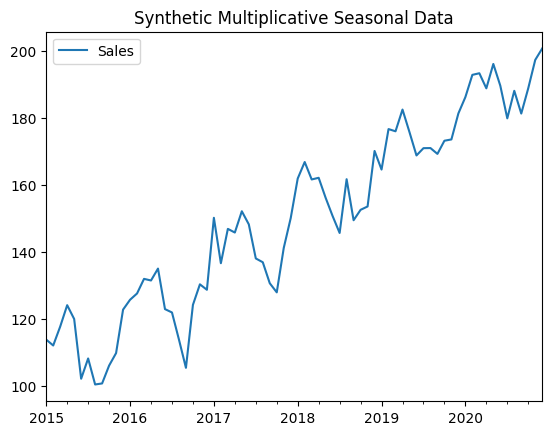

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.421
Date:                            Tue, 14 Oct 2025   AIC                            388.841
Time:                                    22:48:24   BIC                            399.229
Sample:                                01-31-2015   HQIC                           392.896
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0075      0.183      0.041      0.967      -0.352       0.367
ma.L1         -0.9994     13.136   

[]

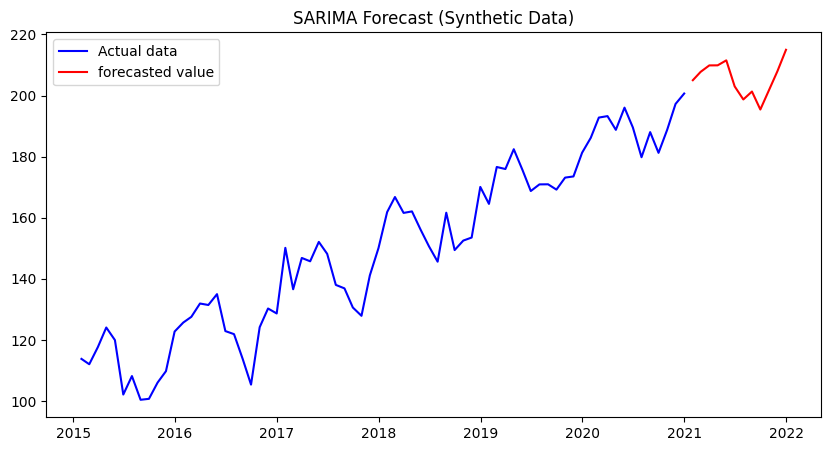

In [21]:
#SARIMA on Synthetic Seasonal Sales Data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
#create synthetic data 
np.random.seed(0) 
months = pd.date_range(start='2015-01', periods=72, freq='M') 
seasonal = 10 * np.sin(2 * np.pi * months.month / 12) 
trend = np.linspace(100, 200, 72) 
noise = np.random.normal(0, 5, 72) 
sales = trend + seasonal + noise 
data = pd.DataFrame({'Sales': sales}, index=months) 
display(data)
data.plot(title='Synthetic Multiplicative Seasonal Data') 
plt.show()
sarima = SARIMAX(data['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12)) 
sarima_fit = sarima.fit() 
print(sarima_fit.summary()) 
forecast=sarima_fit.get_forecast(12)
forecast_df=forecast.summary_frame()
print(forecast_df)
plt.figure(figsize=(10,5))
plt.plot(data['Sales'],label="Actual data",color='blue')
plt.plot(forecast_df['mean'],label="forecasted value",color='red')
plt.title('SARIMA Forecast (Synthetic Data)') 
plt.legend() 
plt.plot() 